## Лабораторна робота №2.



Оцінювання даної роботи буде ураховувати якість ваших візуалізацій (вони можуть незначно відрізнятися від прикладів, але повинні змістовно відображати суть задачі) та опис отриманих вами результатів. При наявності ЛИШЕ візуалізацій без роз'яснень, робота оцінюватися НЕ БУДЕ.

Під час виконання вам дозволено користуватися будь-якими зручними для вас бібліотеками для візуалізації.

Роботи ідентифіковані як ІДЕНТИЧНІ одразу отримують 0 балів.






Для виконання цієї лабораторної роботи Вам необхідно скористатися вибіркою `titanic.csv`.  
Цей датасет ви вже використовували в лабораторній роботі №1 ;)  
  
  ```NB:побудовані графіки та гістограми мають бути змістовними і візуально зрозумілими.```
  
  
  

In [1]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

import re

dataset = pd.read_csv("./titanic.csv")

(Done) **Задача 1:** Який відсоток виживання серед чоловіків / жінок?

In [110]:
df_all_people = dataset[["Sex", "Survived"]]

survived_women = df_all_people.value_counts()["female"][1]
survived_men = df_all_people.value_counts()["male"][1]

dead_women = df_all_people.value_counts()["female"][0]
dead_men = df_all_people.value_counts()["male"][0]

all_women = len(df_all_people[df_all_people['Sex'] == 'female'])
all_men = len(df_all_people[df_all_people['Sex'] == 'male'])

survived_women_percentage = (survived_women / all_women) * 100
survived_men_percentage = (survived_men / all_men) * 100

# display(df_all_people)

print(f"Survived women percentage: {survived_women_percentage}%")
print(f"Survived men percentage: {survived_men_percentage}%")

Survived women percentage: 74.20382165605095%
Survived men percentage: 18.890814558058924%


(Done) **Задача 2:** Відтворіть ці графіки  
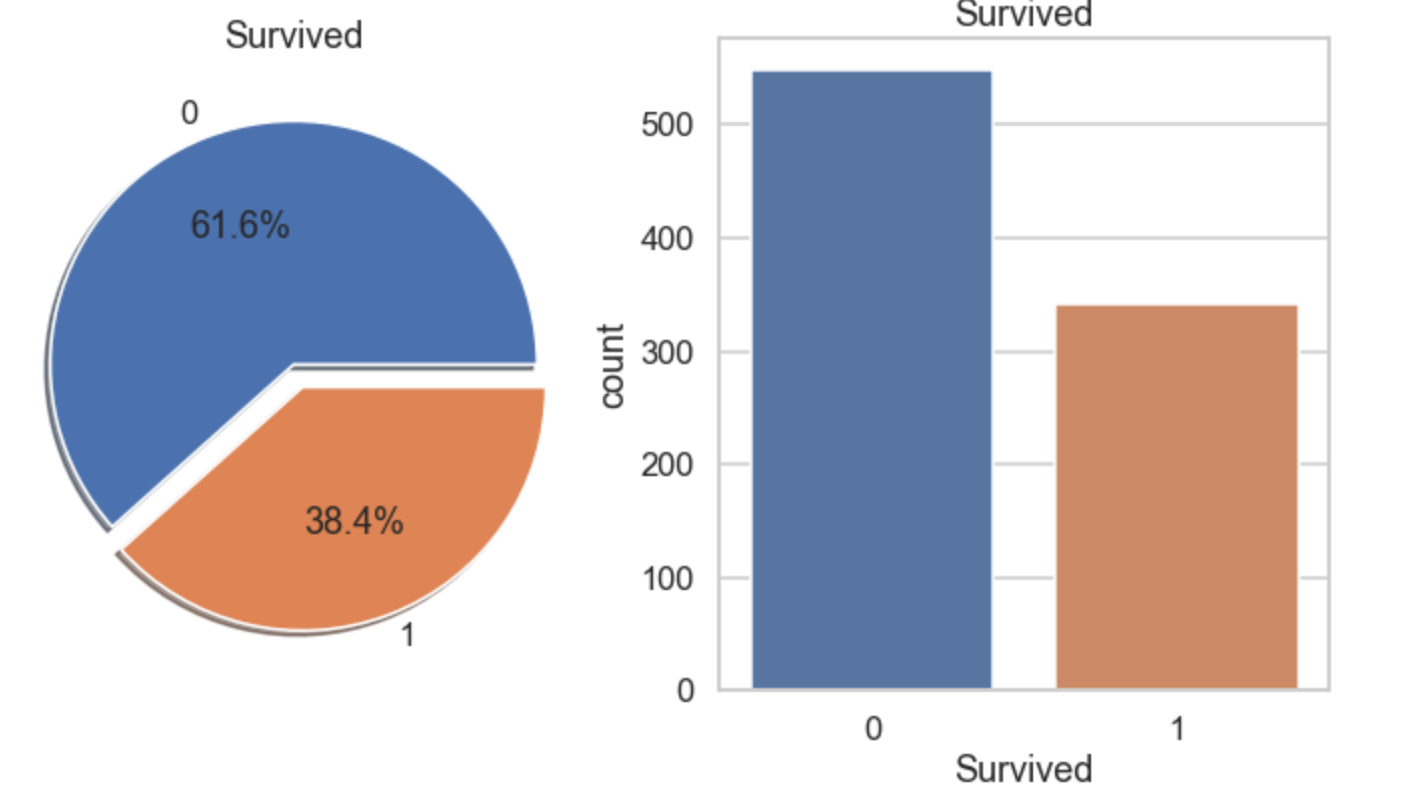


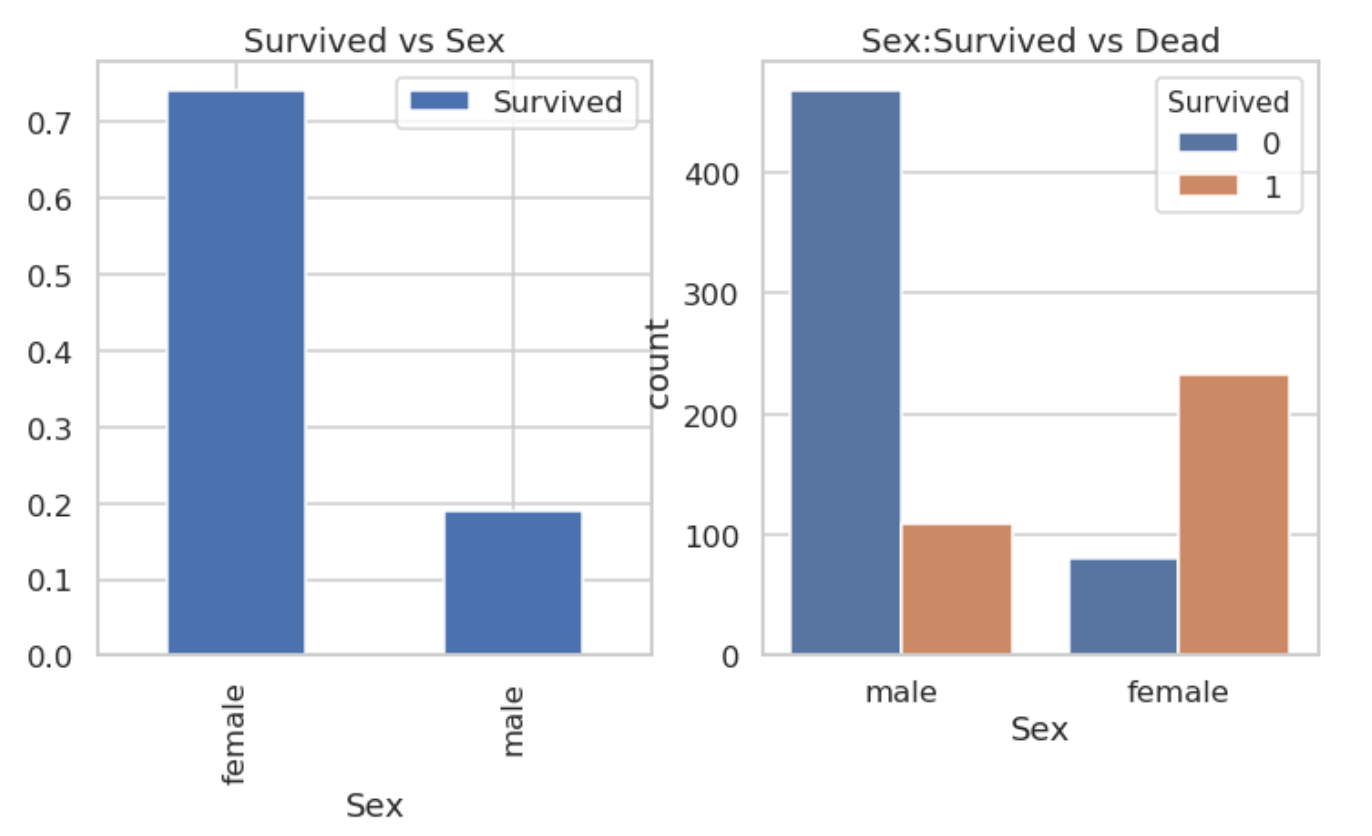

Text(0.5, 1.0, 'Figure 4: Sex: Survived vs Dead')

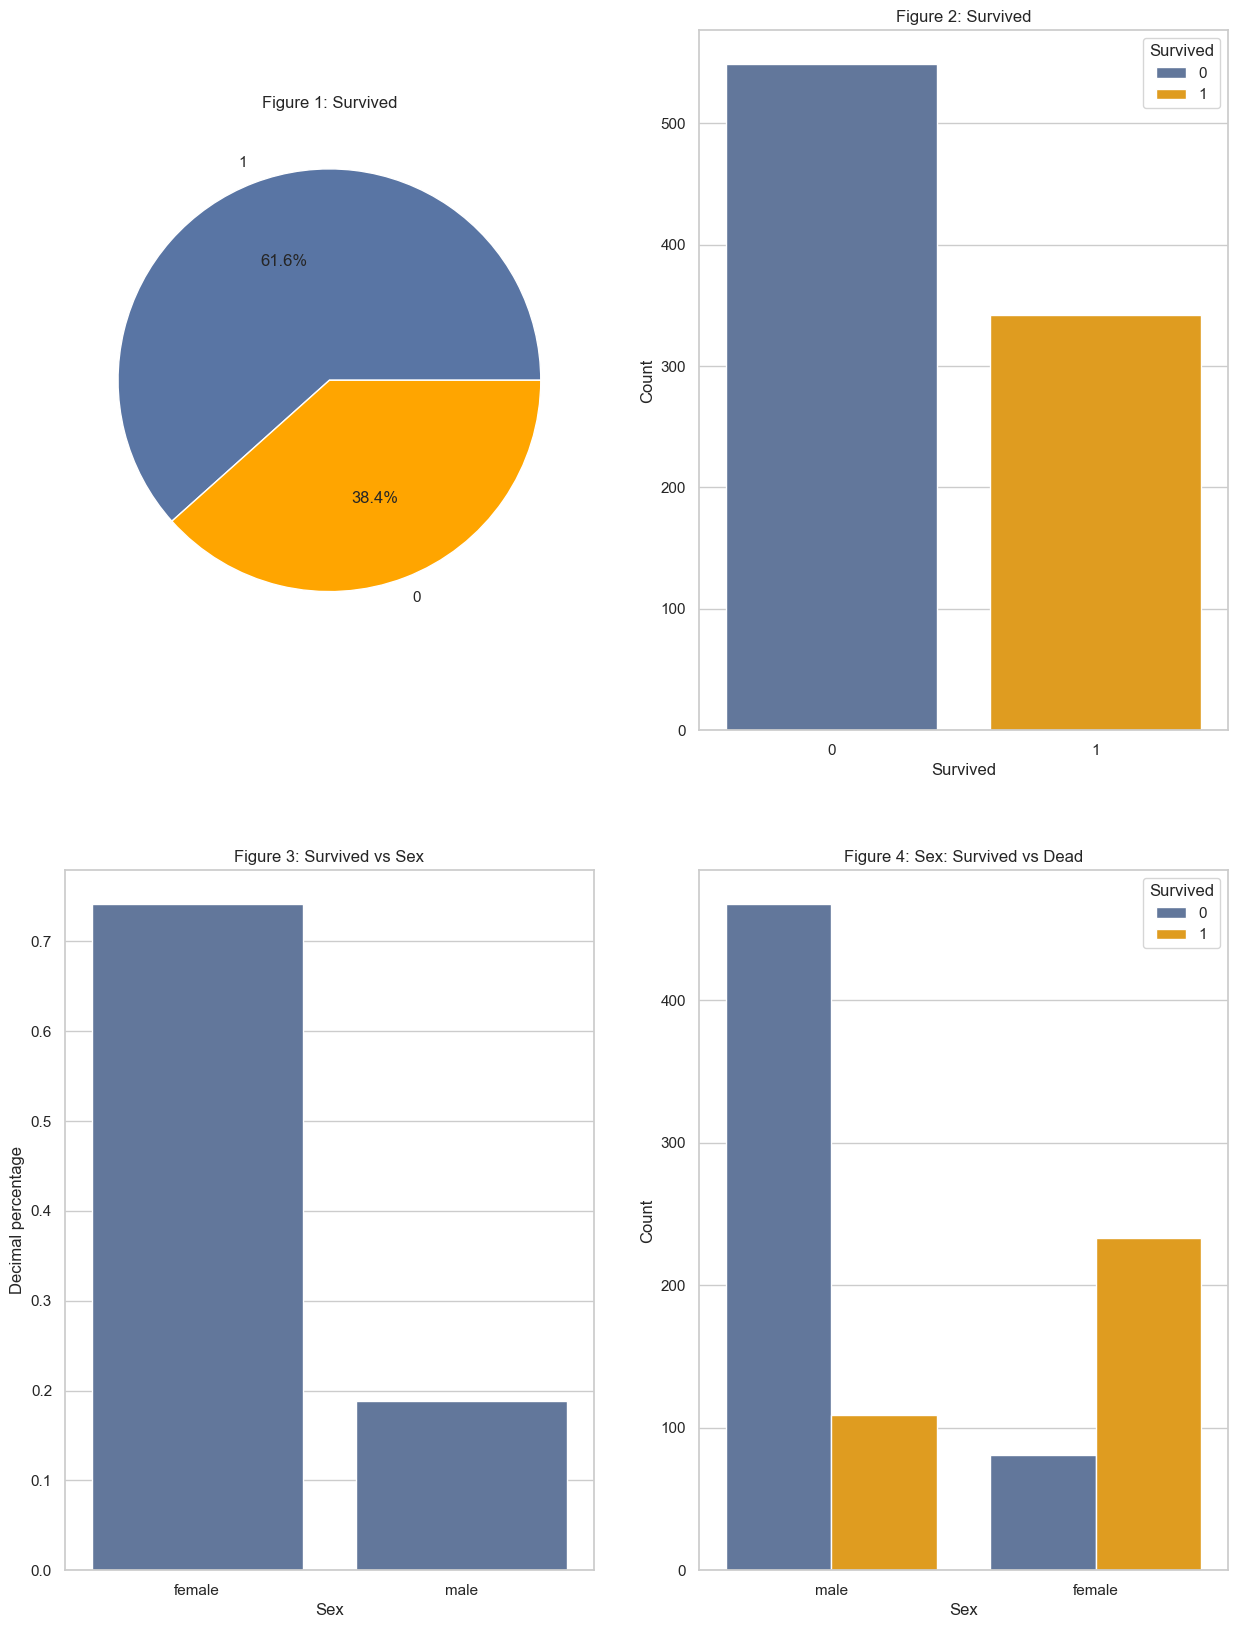

In [136]:
df_survived = dataset[["Survived"]]
survavial_numbers = df_survived.value_counts()

number_of_all_people = len(df_survived)

survived_percentage = (survavial_numbers[0] / number_of_all_people) * 100
died_percentage = (survavial_numbers[1] / number_of_all_people) * 100

df_survival_rate = pd.DataFrame({'Survived': [1, 0], 'Percentage': [survived_percentage, died_percentage]})
df_survival_count = pd.DataFrame({'Count': [survavial_numbers[0], survavial_numbers[1]], 'Survived': [0, 1]})

df_survived_vs_sex = pd.DataFrame({'Sex': ['female', 'male'], 'Decimal percentage': [(survived_women / all_women), (survived_men / all_men)]}) 
df_survived_and_dead = pd.DataFrame({'Sex': ['male', 'female', 'male', 'female'], 'Survived': [1, 1, 0, 0], 'Count': [survived_men, survived_women, dead_men, dead_women]})

# display(survavials)
# display(df_survavial_count)
# display(df_survived_vs_sex)
# display(df_survived_and_dead)


fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2,2, figsize=(15, 20))

ax1.pie(df_survival_rate['Percentage'], labels=df_survival_rate['Survived'], autopct='%1.1f%%', colors=['#5975A4', 'orange'])
ax1.set_title("Figure 1: Survived")

sns.barplot(data = df_survival_count, x = "Survived", y = "Count", ax=ax2, hue="Survived", palette=['#5975A4', 'orange'])
ax2.set_title("Figure 2: Survived") 

sns.barplot(data = df_survived_vs_sex, x = "Sex", y = "Decimal percentage", ax=ax3, color='#5975A4')
ax3.set_title("Figure 3: Survived vs Sex")

sns.barplot(data = df_survived_and_dead, x = "Sex", y = "Count", hue="Survived", dodge=True, ax=ax4, palette=['#5975A4', 'orange'])
ax4.set_title("Figure 4: Sex: Survived vs Dead")

Прокоментуйте побудовані графіки

<font color='#F5E398'><b>Рисунок №1:</b></font> Зображає відсоткове відношення всіх загинувших на Титаніку людей до всіх виживших. На рисунку показано, що з усіх людей вижило близько 38,4% та 61,6% людей загинуло.  

<font color='#F5E398'><b>Рисунок №2:</b></font> Зображає кількість усіх загинувших (стовпчик 0) та усіх виживших (стовпчик 1) людей. З вигляду діаграми можна зробити висновок, що набагато більше людей загинуло, аніж вижило.

<font color='#F5E398'><b>Рисунок №3:</b></font> Зображає відсоткове відношення всіх виживших жінок до усіх виживших чоловіків. З графіку видно, що більше 70% жінок вижило, а чоловіків - менше 20%.

<font color='#F5E398'><b>Рисунок №4:</b></font> Зображає окремо кількість усіх виживших чоловіків і жінок та кількість загиблих чоловіків і жінок. З графіку видно, що жінок вижило набагато більше, ніж чоловіків. Також, переважна кількість чоловіків загинула.

(Done) **Задача 3:** Скільки пропущених значень в датасеті по кожній із змінних?

In [156]:
headers = [header for header in dataset.columns ]
nan_list = {}

def get_nan():
    for header in headers:
        nan = dataset[header].isna().sum()
        nan_list[header] = nan

get_nan()

for column, count in nan_list.items():
    print(f"{column}: {count}")


PassengerId: 0
Survived: 0
Pclass: 0
Name: 0
Sex: 0
Age: 177
SibSp: 0
Parch: 0
Ticket: 0
Fare: 0
Cabin: 687
Embarked: 2


**Задача 4:** Назвіть найпопулярніше **жіноче** ім'я на кораблі.

In [70]:
df_women_full_names = dataset.loc[dataset["Sex"] == 'female', ["Name"]]
df_women_full_names.to_csv('./women_names.csv', sep=',', index=False, encoding='utf-8')

with open('./women_names.csv', "r") as f:
    processed_names = []
    data_list = f.read().splitlines()
    for line in data_list:
        is_husband_name = re.search(r"(\(.+\))", line)
        if is_husband_name:
            name = re.search(r"(\([A-Z][a-z]+)", line)
            if name:
                processed_names.append(name.group(1)[1:])
        else:
            name = re.search(r"(\.\s[A-Z][a-z]+)", line)
            if name:
                processed_names.append(name.group(1)[2:])

df_women_first_names = pd.DataFrame({"Female name": processed_names})
df_women_first_names.value_counts().nlargest(3)

# display(df_women_first_names)


# get all titles, get all text after title, then count

Female name
Anna           15
Mary           14
Elizabeth      11
Name: count, dtype: int64

Найпопулярнішим жіночим ім'ям є Anna (15 жінок), після цього йде ім'я Mary (14 жінок) та Elizabeth (11 жінок).

**Задача 5:** Назвіть найпопулярніше **чоловіче** ім'я на кораблі.

In [78]:
df_men_full_names = dataset.loc[dataset["Sex"] == 'male', ["Name"]]
df_men_full_names.to_csv('./men_names.csv', sep=',', index=False, encoding='utf-8')

with open('./men_names.csv', "r") as f:
    processed_names = []
    data_list = f.read().splitlines()
    for line in data_list:
        full_name = re.search(r"(\..+)", line)
        if full_name:
            full_name = full_name.group(1)[2:]
            punctuation_list = [',', '.', ':', ";", "!", "?", "'", '"']
            for p in punctuation_list:
                if p in full_name:
                    full_name = full_name.replace(p, "")
            name = full_name.split()
            for i in name:
                processed_names.append(i)

df_men_first_names = pd.DataFrame({"Male name": processed_names})
df_men_first_names.value_counts().nlargest(3)

# display(df_men_first_names)

Male name
William      48
John         36
Henry        28
Name: count, dtype: int64

Найпопулярнішим чоловічим ім'ям є William (35 чоловіків), після цього йде ім'я John (25 чоловіків) та George (14 чоловіків).

(Done) **Задача 6:** Побудуйте діаграми співвідношення загиблих та виживших за інформацією про те, квитки якого класу були у пасажирів.
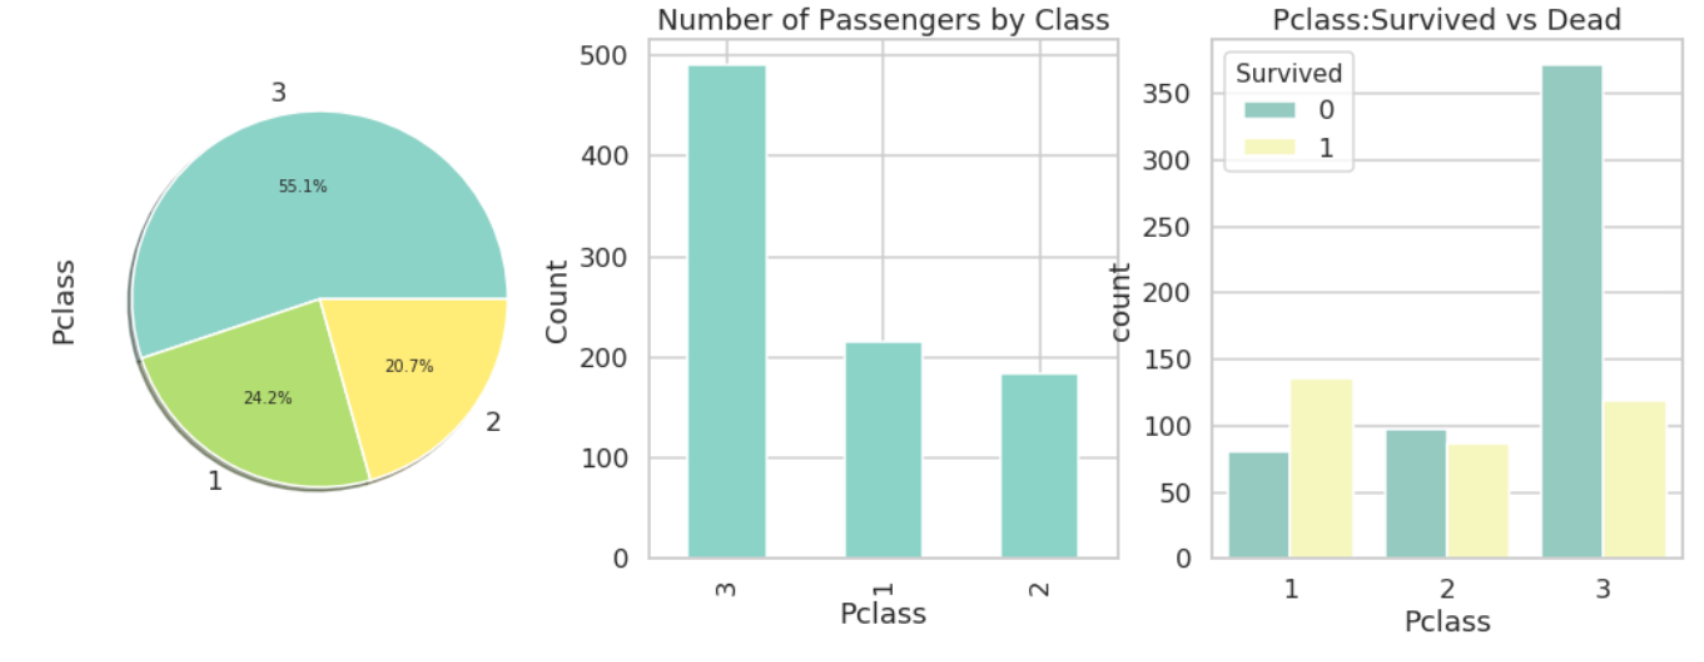

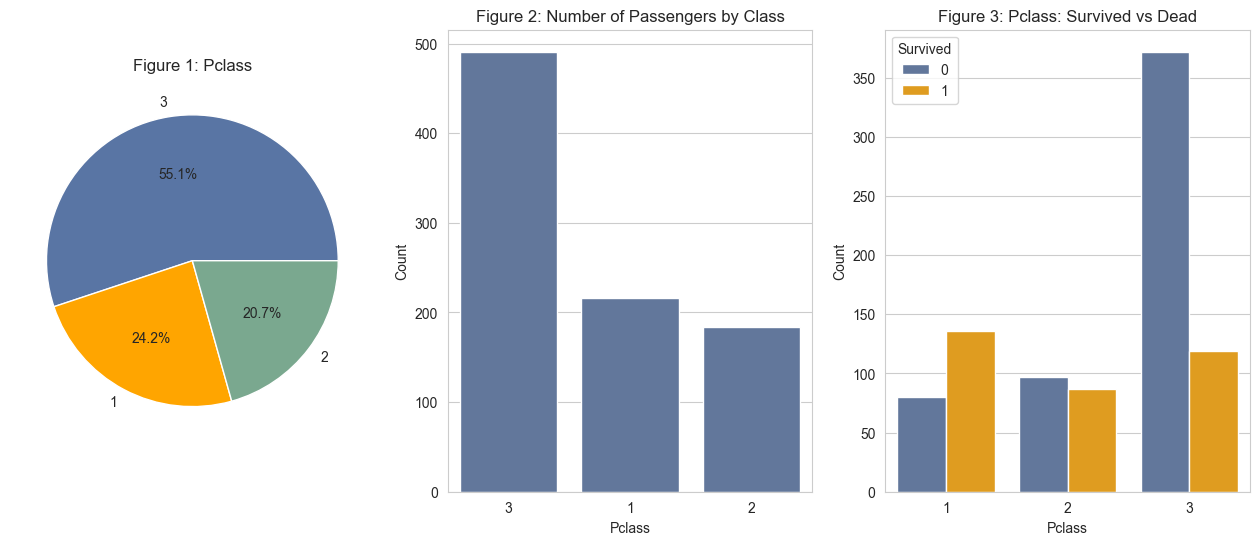

In [161]:
df_pclass = dataset[["Pclass"]]

pclass_rates = (df_pclass["Pclass"].value_counts() / len(df_pclass)) * 100
df_pclass_rates = pd.DataFrame({"Pclass": pclass_rates.index, "Percentage": pclass_rates.values})

pclass_count = df_pclass["Pclass"].value_counts()
df_pclass_count = pd.DataFrame({"Pclass": pclass_count.index, "Count": pclass_count.values})

df_pclass_survival = dataset[["Pclass", "Survived"]]

pclass_survival_count = df_pclass_survival.groupby("Survived")["Pclass"].value_counts()
df_pclass_survival_count = pd.DataFrame({"Survived": pclass_survival_count.index.get_level_values("Survived"), "Pclass": pclass_survival_count.index.get_level_values("Pclass"), "Count": pclass_survival_count.values})


fig, ((ax1, ax2, ax3)) = plt.subplots(1,3, figsize=(16, 6))

ax1.pie(df_pclass_rates["Percentage"], labels=df_pclass_rates['Pclass'], autopct='%1.1f%%', colors=['#5975A4', 'orange', '#7AA88F'])
ax1.set_title("Figure 1: Pclass")

sns.set_style("whitegrid")
sns.barplot(data = df_pclass_count, x = "Pclass", y = "Count", ax=ax2, color='#5975A4', order=df_pclass_count.sort_values("Count", ascending=False).Pclass)
ax2.set_title("Figure 2: Number of Passengers by Class")

sns.barplot(data = df_pclass_survival_count, x = "Pclass", y = "Count", ax=ax3, palette=['#5975A4', 'orange'], hue="Survived")
ax3.set_title("Figure 3: Pclass: Survived vs Dead")

plt.show()

Прокоментуйте побудовані графіки

<font color='#F5E398'><b>Рисунок №1:</b></font> Зображає відсоткове відношення всіх класів пасажирів. На рисунку показано, що на Титаніку найбільше було пасажирів третього класу (близько 55.1%), потім - першого класу (близько 24.2%) та другого класу (близько 20.7%).

<font color='#F5E398'><b>Рисунок №2:</b></font> Зображає кількість пасажирів кожного з класів у порядку спадання. З графіку видно, що пасажирів третього класу було найбільше (майже 500 пасажирів). На другому місці по кількості було пасажирів першого класу (трохи більше 200 пасажирів), а на третьому - другого класу (майже 200 пасажирів).

<font color='#F5E398'><b>Рисунок №3:</b></font> Зображає окремо кількість виживших та кількість загинувших пасажирів відповідно до їхнього класу. Найбільше загинуло людей третього класу (майже 400 пасажирів), а найбільше вижило людей першого класу (майже 150 пасажирів). Людей другого класу загинуло та вижило приблизно в однаковій кількості.

**Задача 7:** Побудуйте наступні графіки та опишіть, що власне на них відображається.  
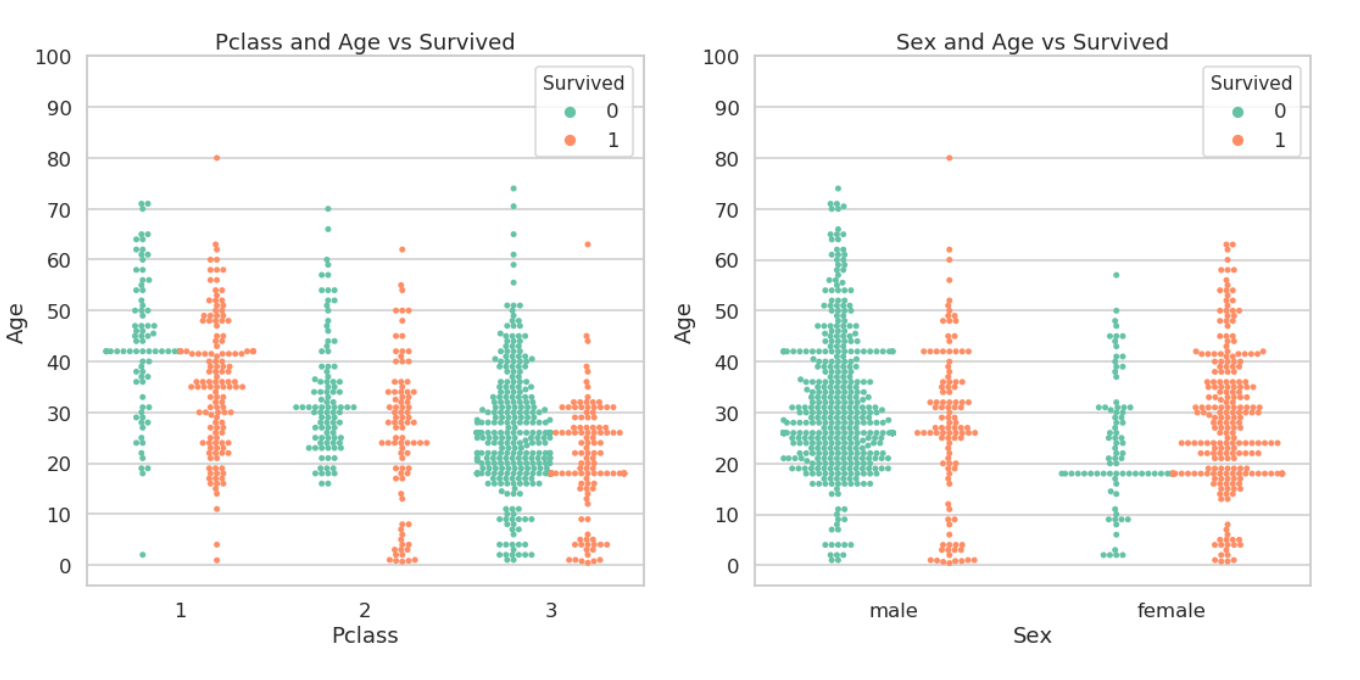![image.png](attachment:51486806-bd5d-4ae3-b95a-548aebf83de2.png)

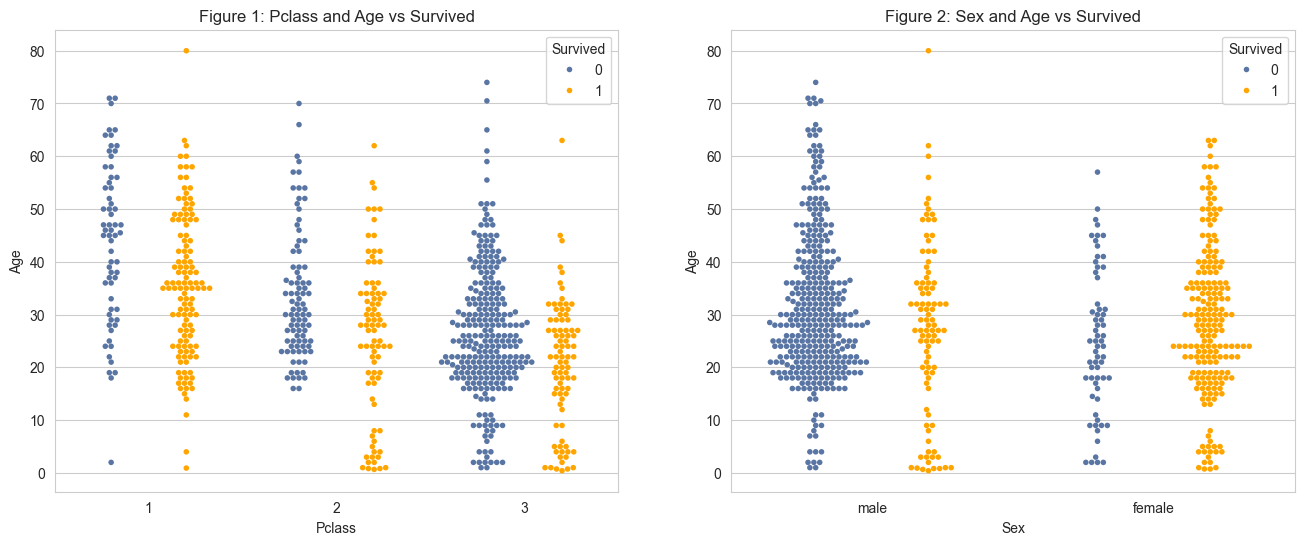

In [68]:
df_pclass_age_survived = dataset[["Pclass", "Age", "Survived"]]

df_sex_age_survived = dataset[["Sex", "Age", "Survived"]]

fig, (ax1, ax2) = plt.subplots(1,2, figsize=(16, 6))
sns.set_style("whitegrid")

sns.swarmplot(data=df_pclass_age_survived, x="Pclass", y="Age", hue="Survived", dodge=True, ax=ax1, size=4, palette=['#5975A4', 'orange'])
ax1.set_title("Figure 1: Pclass and Age vs Survived")

sns.swarmplot(data=df_sex_age_survived, x="Sex", y="Age", hue="Survived", dodge=True, ax=ax2, size=4, palette=['#5975A4', 'orange'])
ax2.set_title("Figure 2: Sex and Age vs Survived")

plt.show()

Прокоментуйте побудовані графіки

<font color='#F5E398'><b>Рисунок №1:</b></font> Зображає окремо кількість загиблих людей та виживших людей кожного віку відповідно до їхнього класу. З графіку видно, що людей першого класу загинуло найменше і, переважно, це були люди від близько 20 років до 65 років. Найбільше загинуло людей третього класу, віком від 0 років до 50 років.

<font color='#F5E398'><b>Рисунок №2:</b></font> Зображає окремо кількість загиблих пасажирів та виживших пасажирів кожного віку відповідно до їхньої статі. З графіку видно, що чоловіків загинуло набагато більше за жінок, і вони переважно були віком від близько 17 років до 55 років. Вижило багато дітей віком до 10 років (як і жіночої, так і чоловічої статі). Жінок загинуло набагато менше, найбільше від близько 2 років до 30 років та від 37 років до 50 років.

**Задача 8** Побудуйте наступні діаграми розподілів:  

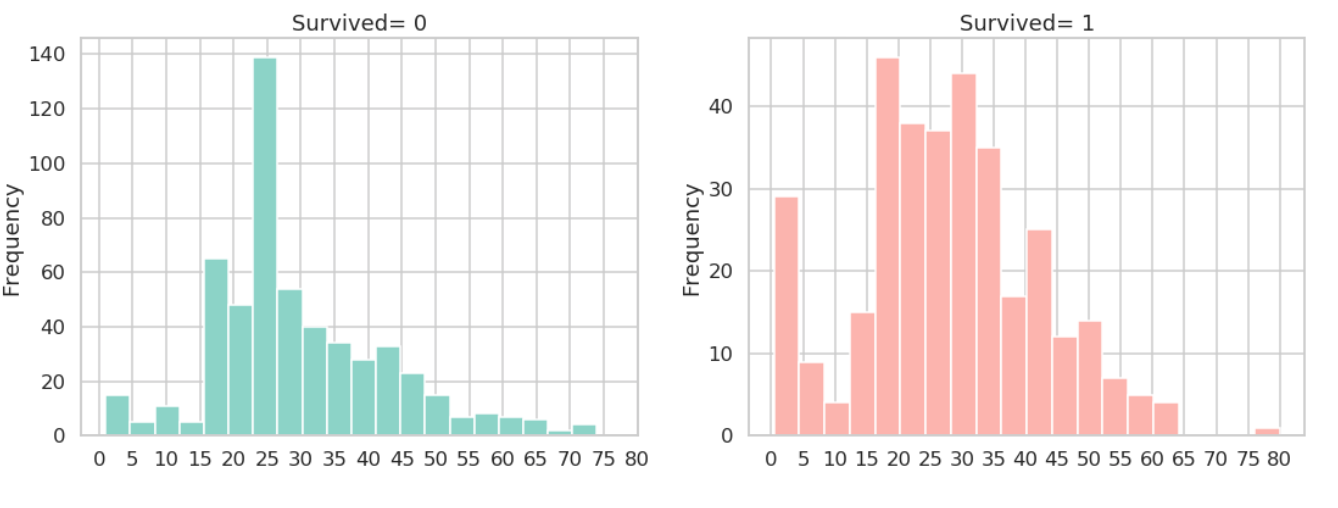



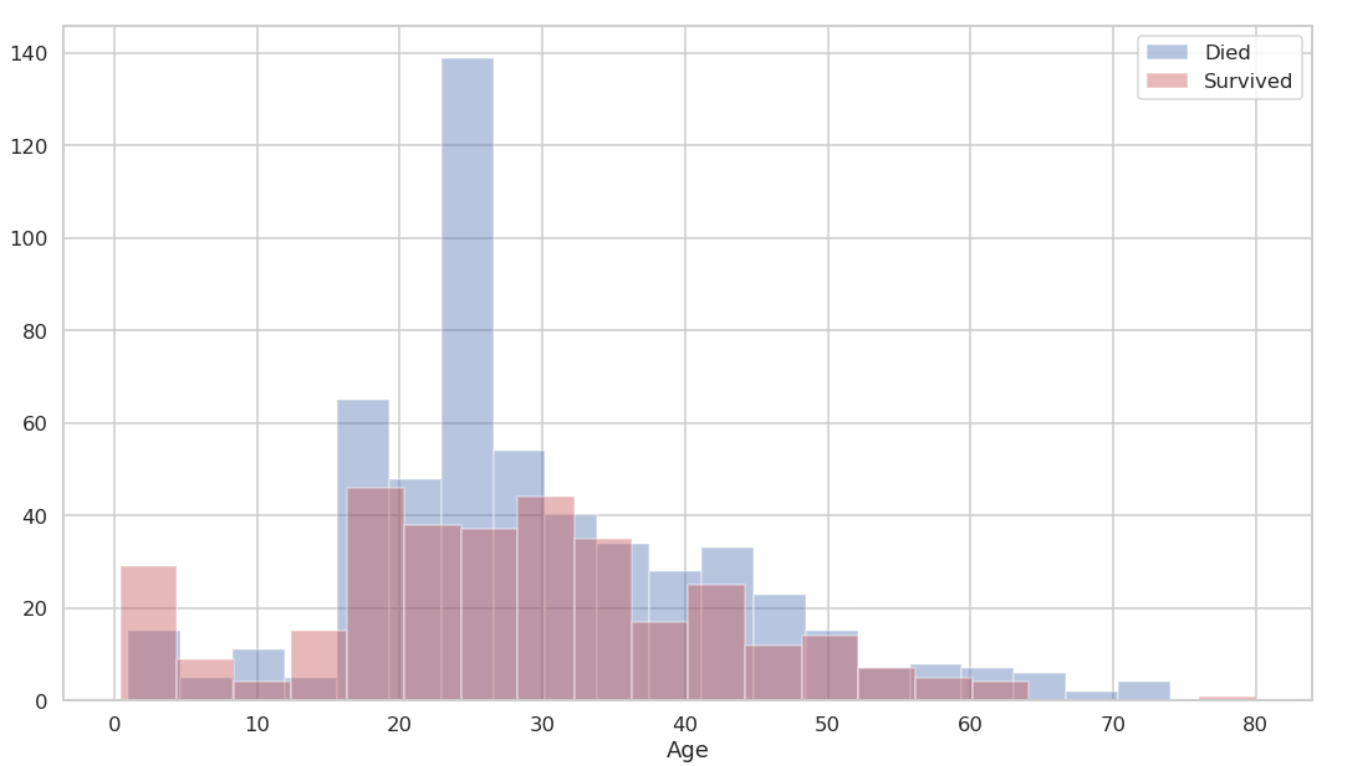

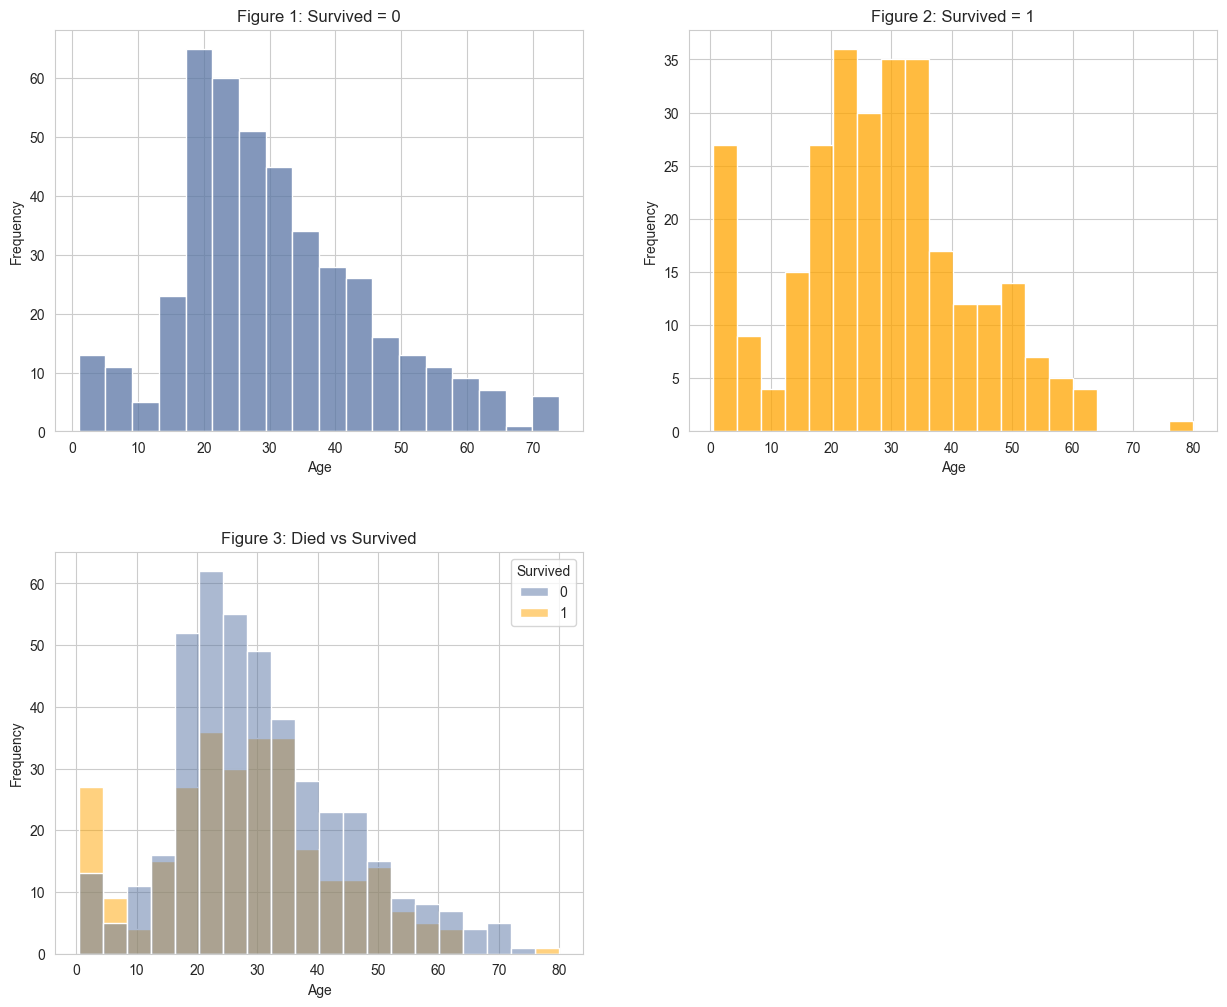

In [9]:
df_survived_age = dataset.loc[dataset["Survived"] == 1, ["Age"]]
df_died_age = dataset.loc[dataset["Survived"] == 0, ["Age"]]
df_survived_and_dead = dataset[["Survived", "Age"]]


fig = plt.figure(figsize=(15, 12))
plt.subplots_adjust(hspace=0.3)

ax1 = fig.add_subplot(2,2,1)
ax2 = fig.add_subplot(2,2,2)
ax3 = fig.add_subplot(2,2,3)

sns.histplot(data=df_died_age, x="Age", ax=ax1, color='#5975A4', binwidth=4)
ax1.set_title("Figure 1: Survived = 0")
ax1.set_ylabel("Frequency")

sns.histplot(data=df_survived_age, x="Age", ax=ax2, color='orange', binwidth=4)
ax2.set_title("Figure 2: Survived = 1")
ax2.set_ylabel("Frequency")

sns.histplot(data=df_survived_and_dead, x="Age", ax=ax3, hue="Survived", palette=["#5975A4", "orange"], binwidth=4)
ax3.set_title("Figure 3: Died vs Survived")
ax3.set_ylabel("Frequency")


plt.show()

Що можна сказати, про розподіли змінних згідно до цих гістограм? Чи достатньо лише побудованих візуалізацій для висновків щодо розподілів та статистичних оцінок?


...

**Задача 9:** Побудуйте наступні діаграми та проведіть аналітику шансів на виживання серед пасажирів:  
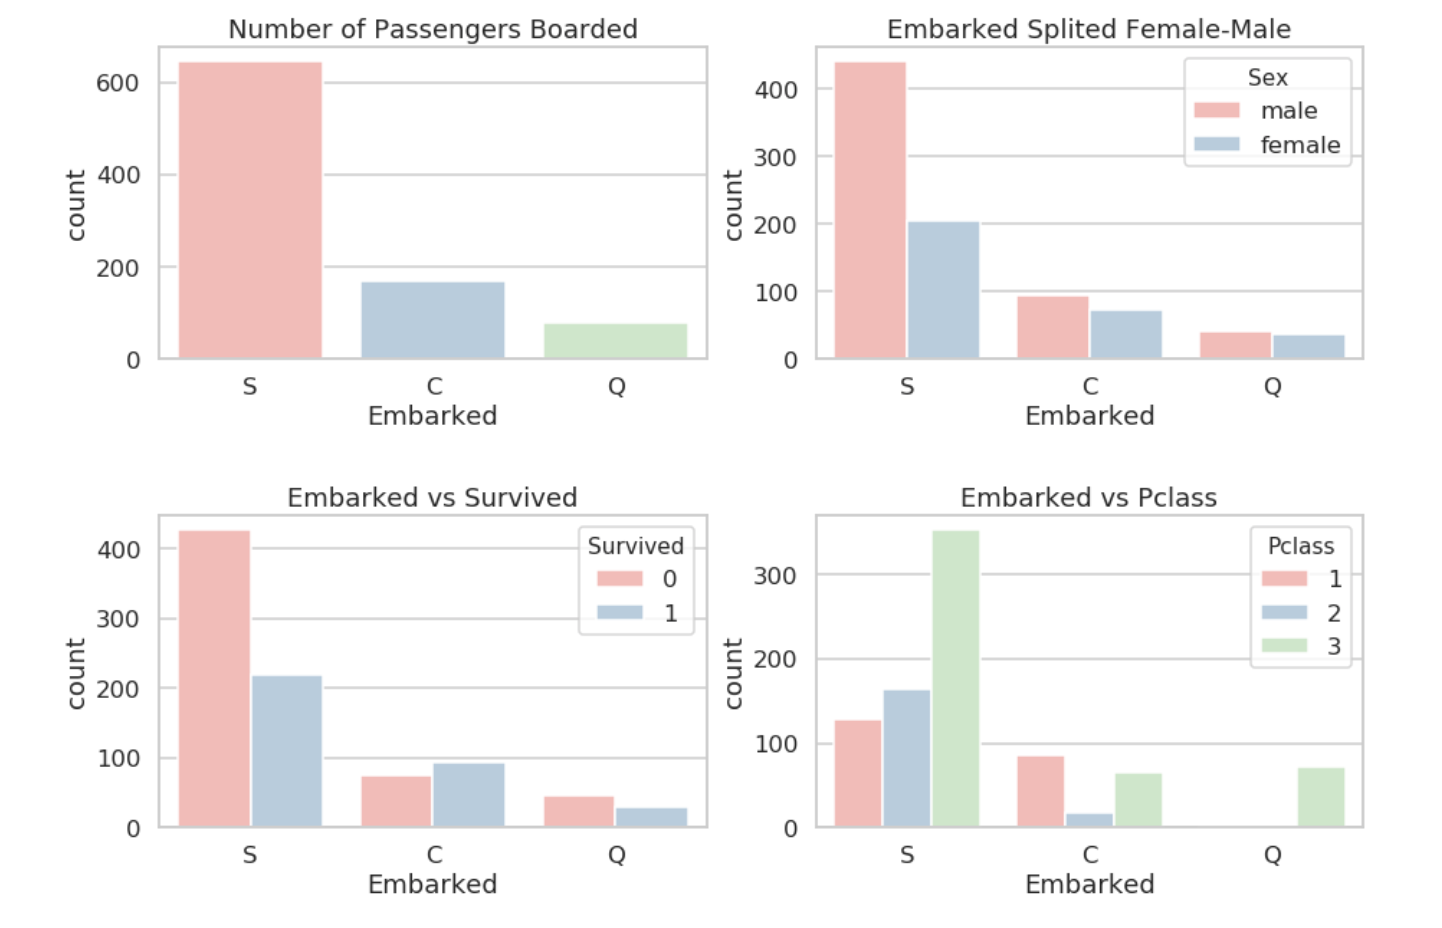

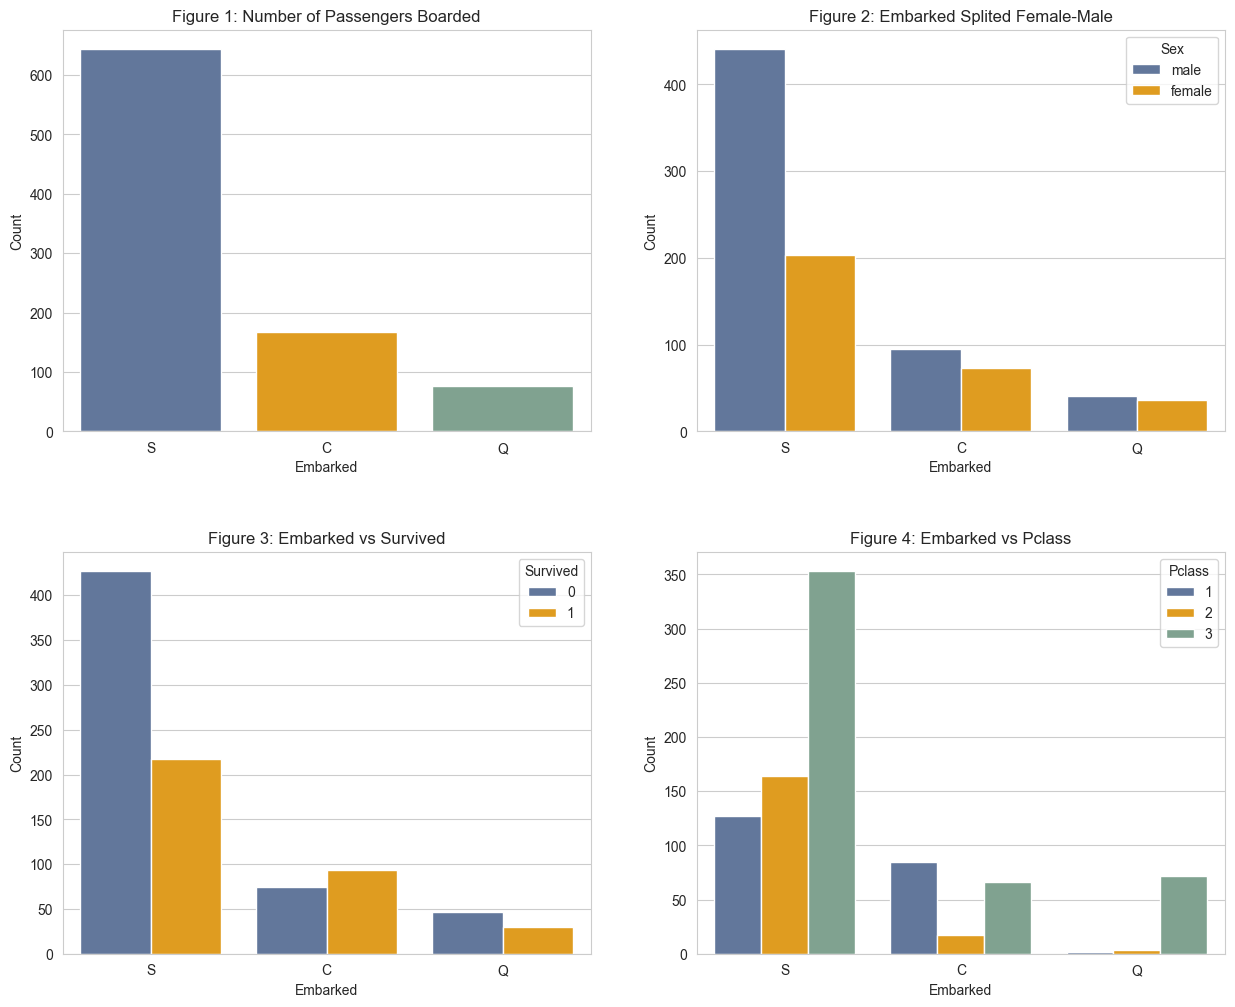

In [46]:
df_embarked = dataset[["Embarked"]]
df_embarked_splited = dataset[["Embarked", "Sex"]]
df_embarked_survived = dataset[["Embarked", "Survived"]]
df_embarked_pclass = dataset[["Embarked", "Pclass"]]

embarked_count = df_embarked.value_counts()
df_embarked_count = pd.DataFrame({"Embarked": embarked_count.index.get_level_values("Embarked"), "Count": embarked_count.values})

embarked_splited = df_embarked_splited.groupby("Embarked").value_counts().sort_values(ascending=False)
df_embarked_sex_count = pd.DataFrame({"Embarked": embarked_splited.index.get_level_values("Embarked"), "Sex": embarked_splited.index.get_level_values("Sex"), "Count": embarked_splited.values})

embarked_survived_count = df_embarked_survived.groupby("Embarked").value_counts().sort_values(ascending=False)
df_embarked_survived_count = pd.DataFrame({"Embarked": embarked_survived_count.index.get_level_values("Embarked"), "Survived": embarked_survived_count.index.get_level_values("Survived"), "Count": embarked_survived_count.values})

embarked_pclass_count = df_embarked_pclass.groupby("Embarked").value_counts().sort_values(ascending=False)
df_embarked_pclass_count = pd.DataFrame({"Embarked": embarked_pclass_count.index.get_level_values("Embarked"), "Pclass": embarked_pclass_count.index.get_level_values("Pclass"), "Count": embarked_pclass_count.values})


fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, figsize=(15, 12))
plt.subplots_adjust(hspace=0.3)

sns.barplot(data = df_embarked_count, x = "Embarked", y = "Count", ax=ax1, palette=['#5975A4', 'orange', '#7AA88F'], hue="Embarked")
ax1.set_title("Figure 1: Number of Passengers Boarded")

sns.barplot(data = df_embarked_sex_count, x = "Embarked", y = "Count", ax=ax2, palette=['#5975A4', 'orange'], hue="Sex")
ax2.set_title("Figure 2: Embarked Splited Female-Male")

sns.barplot(data = df_embarked_survived_count, x = "Embarked", y = "Count", ax=ax3, palette=['#5975A4', 'orange'], hue="Survived")
ax3.set_title("Figure 3: Embarked vs Survived")

sns.barplot(data = df_embarked_pclass_count, x = "Embarked", y = "Count", ax=ax4, palette=['#5975A4', 'orange', '#7AA88F'], hue="Pclass")
ax4.set_title("Figure 4: Embarked vs Pclass")

plt.show()

<font color='#F5E398'><b>Рисунок №1:</b></font> Зображає  

<font color='#F5E398'><b>Рисунок №2:</b></font> Зображає 

<font color='#F5E398'><b>Рисунок №3:</b></font> Зображає 

<font color='#F5E398'><b>Рисунок №4:</b></font> Зображає 

***Завдача 10** Побудуйте діаграму розподілу ```вартості квитка``` відповідно до якого классу належіть пасажир.

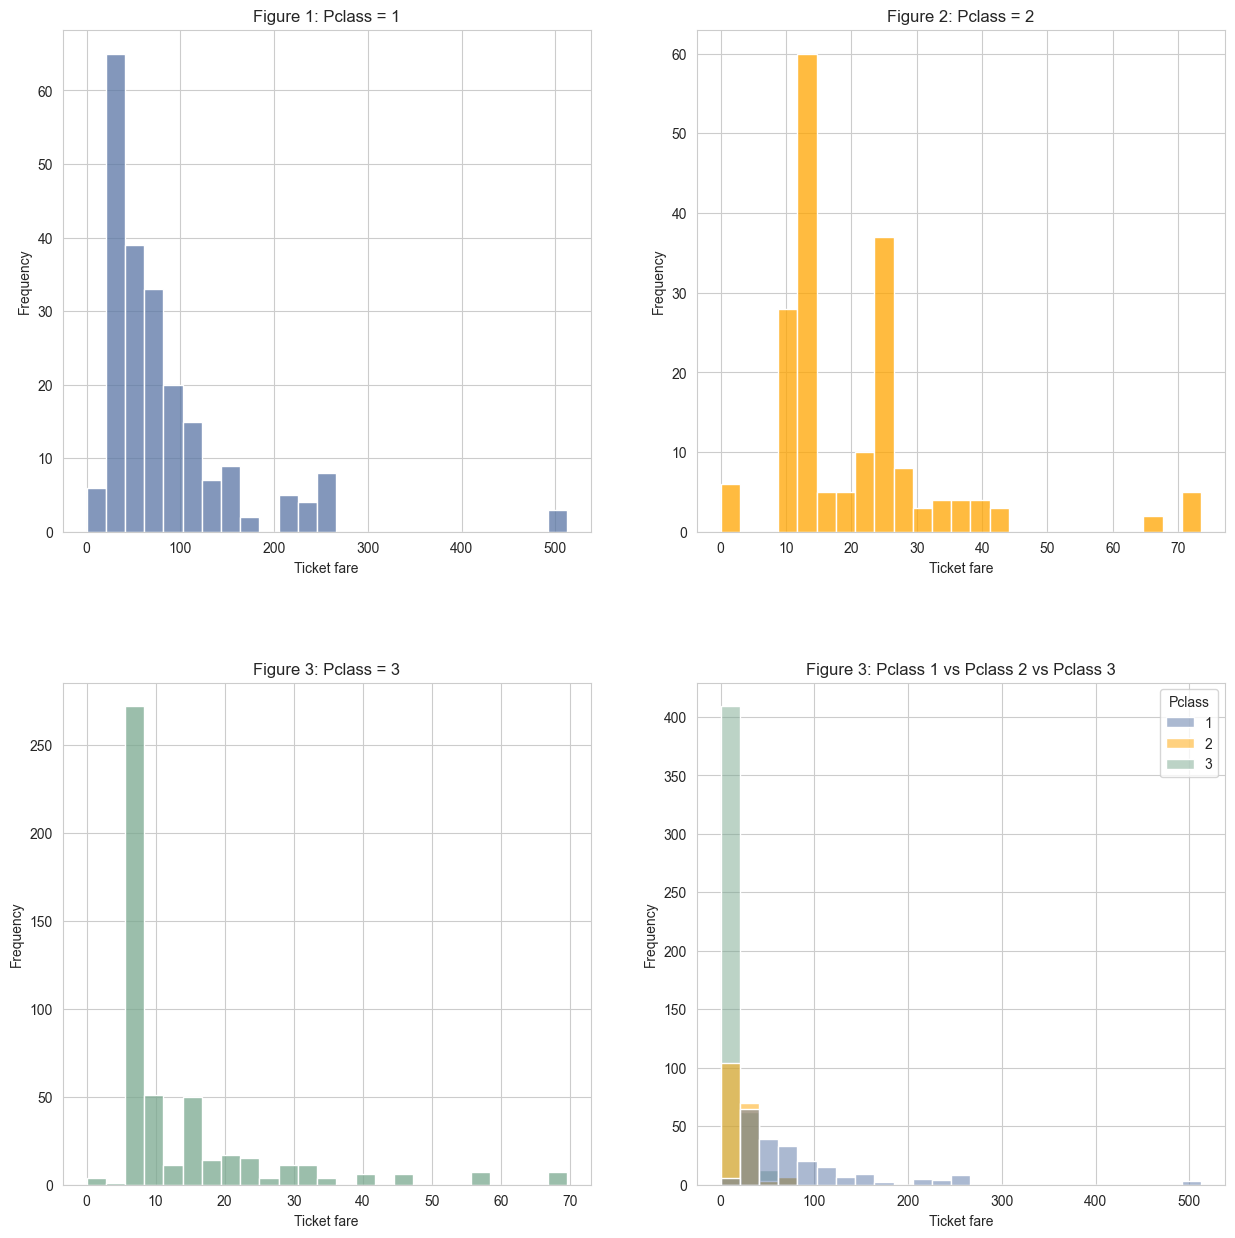

In [67]:
df_1_pclass_price = dataset.loc[dataset["Pclass"] == 1, ["Fare"]]
df_2_pclass_price = dataset.loc[dataset["Pclass"] == 2, ["Fare"]]
df_3_pclass_price = dataset.loc[dataset["Pclass"] == 3, ["Fare"]]
df_pclass_price = dataset[["Pclass", "Fare"]]


fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, figsize=(15, 15))
plt.subplots_adjust(hspace=0.3)

sns.histplot(data=df_1_pclass_price, x="Fare", ax=ax1, color='#5975A4', bins=25)
ax1.set_title("Figure 1: Pclass = 1")
ax1.set_ylabel("Frequency")
ax1.set_xlabel("Ticket fare")

sns.histplot(data=df_2_pclass_price, x="Fare", ax=ax2, color='orange', bins=25)
ax2.set_title("Figure 2: Pclass = 2")
ax2.set_ylabel("Frequency")
ax2.set_xlabel("Ticket fare")

sns.histplot(data=df_3_pclass_price, x="Fare", ax=ax3, color='#7AA88F', bins=25)
ax3.set_title("Figure 3: Pclass = 3")
ax3.set_ylabel("Frequency")
ax3.set_xlabel("Ticket fare")

sns.histplot(data=df_pclass_price, x="Fare", ax=ax4, palette=['#5975A4', 'orange', '#7AA88F'], bins=25, hue="Pclass")
ax4.set_title("Figure 3: Pclass 1 vs Pclass 2 vs Pclass 3")
ax4.set_ylabel("Frequency")
ax4.set_xlabel("Ticket fare")

plt.show()


Прокоментуйте побудовані графіки

<font color='#F5E398'><b>Рисунок №1:</b></font> Зображає   

<font color='#F5E398'><b>Рисунок №2:</b></font> Зображає 

<font color='#F5E398'><b>Рисунок №3:</b></font> Зображає 

<font color='#F5E398'><b>Рисунок №4:</b></font> Зображає 